In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option("display.max_columns", 999)

In [2]:
transaction_df = pd.read_csv("transactions_data.csv")
transaction_df.head(10)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.00,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.00,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.00,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.00,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.00,5813,NaN
5,7475333,2010-01-01 00:07:00,1807,165,$4.81,Swipe Transaction,20519,Bronx,NY,10464.00,5942,NaN
6,7475334,2010-01-01 00:09:00,1556,2972,$77.00,Swipe Transaction,59935,Beulah,ND,58523.00,5499,NaN
7,7475335,2010-01-01 00:14:00,1684,2140,$26.46,Online Transaction,39021,ONLINE,NaN,NaN,4784,NaN
8,7475336,2010-01-01 00:21:00,335,5131,$261.58,Online Transaction,50292,ONLINE,NaN,NaN,7801,NaN
9,7475337,2010-01-01 00:21:00,351,1112,$10.74,Swipe Transaction,3864,Flushing,NY,11355.00,5813,NaN


In [3]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ GB


In [4]:
transaction_df.describe(include="all")

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
count,13305915.00,13305915,13305915.00,13305915.00,13305915,13305915,13305915.00,13305915,11742215,11653209.00,13305915.00,211393
unique,NaN,4136496,NaN,NaN,81161,3,NaN,12492,199,NaN,NaN,22
top,NaN,2011-06-09 12:46:00,NaN,NaN,$80.00,Swipe Transaction,NaN,ONLINE,CA,NaN,NaN,Insufficient Balance
freq,NaN,18,NaN,NaN,132115,6967185,NaN,1563700,1427087,NaN,NaN,130902
mean,15584024.57,NaN,1026.81,3475.27,NaN,NaN,47723.76,NaN,NaN,51327.82,5565.44,NaN
std,4704498.65,NaN,581.64,1674.36,NaN,NaN,25815.34,NaN,NaN,29404.23,875.70,NaN
min,7475327.00,NaN,0.00,0.00,NaN,NaN,1.00,NaN,NaN,1001.00,1711.00,NaN
25%,11506044.50,NaN,519.00,2413.00,NaN,NaN,25887.00,NaN,NaN,28602.00,5300.00,NaN
50%,15570866.00,NaN,1070.00,3584.00,NaN,NaN,45926.00,NaN,NaN,47670.00,5499.00,NaN
75%,19653605.50,NaN,1531.00,4901.00,NaN,NaN,67570.00,NaN,NaN,77901.00,5812.00,NaN


In [5]:
fruad_labels_df = pd.read_json("train_fraud_labels.json")
fruad_labels_df.loc[fruad_labels_df["target"] == "Yes", "target"] = 1
fruad_labels_df.loc[fruad_labels_df["target"] == "No", "target"] = 0
fruad_labels_df["target"] = fruad_labels_df["target"].astype(int)
fruad_labels_df.head()

,target
10649266,0
23410063,0
9316588,0
12478022,0
9558530,0


In [6]:
fruad_labels_df["target"].unique()

array([0, 1])

In [7]:
fruad_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8914963 entries, 10649266 to 15151926
Data columns (total 1 columns):
 #   Column  Dtype
---  ------  -----
 0   target  int32
dtypes: int32(1)
memory usage: 102.0 MB


In [8]:
fruad_labels_df.reset_index(inplace=True)
fruad_labels_df.rename(columns={"index": "id"}, inplace=True)

In [9]:
fruad_labels_df.groupby(by="target").count()

,id
target,
0,8901631
1,13332


In [10]:
# Positive over Negative labels percentage
f'{(len(fruad_labels_df[fruad_labels_df["target"] == 1]) / len(fruad_labels_df[fruad_labels_df["target"] == 0])) * 100} %'

'0.1497703061382796 %'

<h2>Merging the transactions dataset with fruad labels dataset</h2>

In [11]:
transaction_df = transaction_df.merge   (
    fruad_labels_df[["id", 'target']],
    on="id",
    how="left"
    
)
transaction_df.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,target
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.00,5499,NaN,0.00
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.00,5311,NaN,0.00
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.00,4829,NaN,0.00
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.00,4829,NaN,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.00,5813,NaN,0.00


<h3>Sampling labeled records</h3>

In [12]:
fruad_records_df = transaction_df[transaction_df["target"] == 1].copy()
non_fruad_records_sampled = transaction_df[transaction_df["target"] == 0].sample(n=len(fruad_records_df)*3, random_state=45).copy()
balanced_df = pd.concat([fruad_records_df, non_fruad_records_sampled])
# Shuffle the balanced data
balanced_df = balanced_df.sample(frac=1, random_state=45).reset_index(drop=True)
balanced_df.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,target
0,22960688,2019-05-15 11:24:00,1549,4825,$160.00,Chip Transaction,27092,Houston,TX,77268.00,4829,NaN,0.00
1,10960063,2012-04-07 10:05:00,1497,3655,$62.85,Swipe Transaction,72650,Sacramento,CA,95820.00,5300,NaN,0.00
2,16800548,2015-10-13 14:22:00,257,3816,$272.76,Online Transaction,19964,ONLINE,NaN,NaN,5311,NaN,1.00
3,22447253,2019-01-26 13:33:00,27,1051,$33.40,Chip Transaction,53492,Rome,Italy,NaN,5094,NaN,1.00
4,20684787,2018-01-17 22:45:00,261,30,$326.06,Online Transaction,38958,ONLINE,NaN,NaN,7801,NaN,0.00


In [13]:
balanced_df.to_csv("balanced_and_sampled_data.csv")

<h3>Data & Feature preparation for Logistic Regression(Feature Engineering)</h3>

In [ ]:
# Checking for odd values for amount
balanced_df[balanced_df["amount"].str.match(r"^^\$-?\d+(\.\d{1,2})?$") == False]["amount"].unique()

array([], dtype=object)

In [ ]:
balanced_df["amount"] = balanced_df["amount"].str.replace("$", "").astype(float)
balanced_df["amount"].head()

0                 160.00
1                  62.85
2                 272.76
3                  33.40
4                 326.06
Name: amount, dtype: float64

In [ ]:
balanced_df["date"] = pd.to_datetime(balanced_df["date"], format=r"%Y-%m-%d %H:%M:%S")
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53328 entries, 0 to 53327
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              53328 non-null  int64         
 1   date            53328 non-null  datetime64[ns]
 2   client_id       53328 non-null  int64         
 3   card_id         53328 non-null  int64         
 4   amount          53328 non-null  float64       
 5   use_chip        53328 non-null  object        
 6   merchant_id     53328 non-null  int64         
 7   merchant_city   53328 non-null  object        
 8   merchant_state  39859 non-null  object        
 9   zip             36292 non-null  float64       
 10  mcc             53328 non-null  int64         
 11  errors          1209 non-null   object        
 12  target          53328 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 5.3+ MB


In [17]:
# Finding that each transaction wich day of year happend.(from 0 to 365)
day_of_year = balanced_df["date"].dt.dayofyear

# Converting the day of the year to a sine value to represent its cyclic nature. 
# This helps the model understand that days repeat in a cycle (e.g., January is closer to December in time).
balanced_df["sin_day"] = np.sin(2 * np.pi * day_of_year / 365)

In [18]:
balanced_df["sin_day"].head(5)

0                   0.73
1                   0.99
2                  -0.98
3                   0.43
4                   0.29
Name: sin_day, dtype: float64

<Axes: xlabel='target', ylabel='sin_day'>

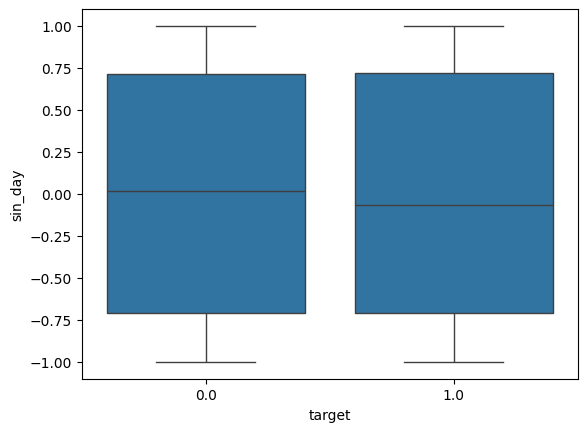

In [ ]:
sns.boxplot(data=balanced_df, x='target', y="sin_day")

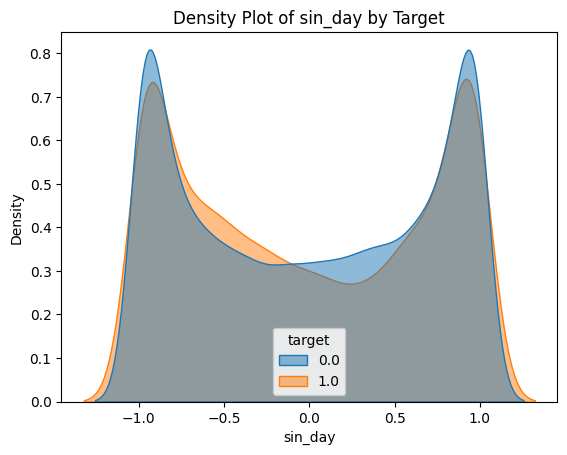

In [20]:
sns.kdeplot(data=balanced_df, x='sin_day', hue="target", fill=True, common_norm=False, alpha=0.5)
plt.title("Density Plot of sin_day by Target")
plt.xlabel("sin_day")
plt.ylabel("Density")
plt.show()

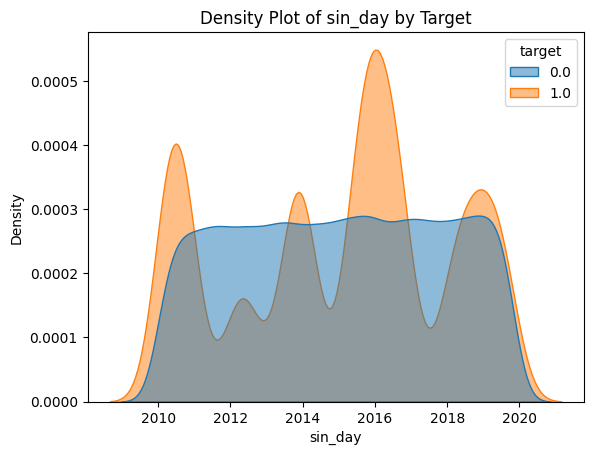

In [21]:
sns.kdeplot(data=balanced_df, x='date', hue="target", fill=True, common_norm=False, alpha=0.5)
plt.title("Density Plot of sin_day by Target")
plt.xlabel("sin_day")
plt.ylabel("Density")
plt.show()

In [ ]:
# Adding a new feature to the dataset by converting daily times to minutes from the beginning of the day (00:00)
from datetime import time
midnight = time(hour=0, minute=0, second=0)
balanced_df["event_time"] = (balanced_df["date"] - balanced_df["date"].dt.normalize()).dt.total_seconds() / 3600
balanced_df["event_time"] = balanced_df["event_time"].round(2)
balanced_df.head(2)


,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,target,sin_day,event_time
0,22960688,2019-05-15 11:24:00,1549,4825,160.00,Chip Transaction,27092,Houston,TX,77268.00,4829,NaN,0.00,0.73,11.40
1,10960063,2012-04-07 10:05:00,1497,3655,62.85,Swipe Transaction,72650,Sacramento,CA,95820.00,5300,NaN,0.00,0.99,10.08


In [23]:
# One-Hot encoding the use_chip feature for using it in Logistic Regression
use_chip_one_hot = pd.get_dummies(balanced_df["use_chip"], prefix="use")
balanced_df = pd.concat([balanced_df, use_chip_one_hot], axis=1)
use_chip_one_hot.head(3)

,use_Chip Transaction,use_Online Transaction,use_Swipe Transaction
0,True,False,False
1,False,False,True
2,False,True,False


In [24]:
balanced_df["use_Chip Transaction"] = balanced_df["use_Chip Transaction"].astype(int)
balanced_df["use_Online Transaction"] = balanced_df["use_Online Transaction"].astype(int)
balanced_df["use_Swipe Transaction"] = balanced_df["use_Swipe Transaction"].astype(int)
balanced_df.head(2)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,target,sin_day,event_time,use_Chip Transaction,use_Online Transaction,use_Swipe Transaction
0,22960688,2019-05-15 11:24:00,1549,4825,160.00,Chip Transaction,27092,Houston,TX,77268.00,4829,NaN,0.00,0.73,11.40,1,0,0
1,10960063,2012-04-07 10:05:00,1497,3655,62.85,Swipe Transaction,72650,Sacramento,CA,95820.00,5300,NaN,0.00,0.99,10.08,0,0,1


In [25]:
# Making a copy of balanced_df before droping some of the unusable feature. (raw date,use_chip)
balanced_df_copy = balanced_df.copy()

In [26]:
# balanced_df.drop(["use_chip", "date"], axis=1, inplace=True)
# balanced_df.head(2)

In [27]:
negative_transactions = balanced_df[balanced_df['amount'] < 0]
print(negative_transactions['target'].value_counts())

target
0.00    2046
1.00     490
Name: count, dtype: int64


In [ ]:
# Adding a new feature that shows is the transaction expenses(When the amount value is negative) or not(if the amount value is positive)?
# Taking the abslute value of amount's column
balanced_df["is_expenses"] = balanced_df["amount"].apply(lambda x: 1 if x < 0.0 else 0)
balanced_df["amount"] = balanced_df["amount"].abs()
balanced_df[balanced_df["is_expenses"] == 1].head(5)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,target,sin_day,event_time,use_Chip Transaction,use_Online Transaction,use_Swipe Transaction,is_expenses
122,14254048,2014-04-10 15:12:00,398,2012,483.00,Swipe Transaction,41523,Sacramento,CA,95823.00,3387,NaN,0.00,0.99,15.20,0,0,1,1
126,16095031,2015-05-15 18:41:00,178,4261,276.00,Chip Transaction,7777,White Plains,NY,10603.00,3684,NaN,0.00,0.73,18.68,1,0,0,1
136,7881926,2010-04-13 13:21:00,604,4280,343.00,Online Transaction,57133,ONLINE,NaN,NaN,3730,NaN,1.00,0.98,13.35,0,1,0,1
143,10234559,2011-10-23 13:50:00,1332,2406,55.00,Swipe Transaction,59935,Port Chester,NY,10573.00,5499,NaN,0.00,-0.93,13.83,0,0,1,1
149,12544271,2013-03-30 15:02:00,100,5903,60.00,Swipe Transaction,43293,Barcelona,Spain,NaN,5499,NaN,0.00,1.00,15.03,0,0,1,1


In [29]:
(transaction_df['errors'].notna().sum() / transaction_df['errors'].isna().sum()) * 100

1.61436209737171

In [30]:
del transaction_df
del fruad_labels_df

In [ ]:
(balanced_df['errors'].notna().sum() / balanced_df['errors'].isna().sum()) * 100

2.31969147527773

In [32]:
balanced_df['errors'].unique()

array([nan, 'Technical Glitch', 'Insufficient Balance', 'Bad Expiration',
       'Bad CVV', 'Bad PIN', 'Bad Card Number',
       'Bad CVV,Technical Glitch', 'Bad Zipcode',
       'Bad CVV,Insufficient Balance', 'Bad PIN,Technical Glitch',
       'Bad PIN,Insufficient Balance',
       'Bad Card Number,Insufficient Balance'], dtype=object)

In [ ]:
error_analysis = balanced_df.groupby(['errors', 'target']).size().unstack(fill_value=0)
error_analysis['fraud_ratio'] = error_analysis[1] / (error_analysis[1] + error_analysis[0])
error_analysis.sort_values(by='fraud_ratio', ascending=False)

target,0.00,1.00,fraud_ratio
errors,,,
"Bad CVV,Insufficient Balance",0,2,1.00
"Bad CVV,Technical Glitch",0,1,1.00
"Bad Card Number,Insufficient Balance",0,1,1.00
"Bad PIN,Insufficient Balance",0,1,1.00
Bad CVV,23,139,0.86
Bad Expiration,19,54,0.74
Bad Card Number,25,59,0.70
Bad PIN,98,112,0.53
Insufficient Balance,380,169,0.31


In [ ]:
# One-Hot Encoding Impactful Errors

needed_errors = ["Bad CVV", 'Bad Expiration', 'Bad Card Number', 'Bad PIN', "Insufficient Balance", 'Technical Glitch', ]

# Creating a new feature for each needed_error
balanced_df['errors'] = balanced_df['errors'].fillna('') 
for error in needed_errors:
    balanced_df[error] = balanced_df["errors"].str.contains(error).astype(int)

balanced_df.head(5)


,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,target,sin_day,event_time,use_Chip Transaction,use_Online Transaction,use_Swipe Transaction,is_expenses,Bad CVV,Bad Expiration,Bad Card Number,Bad PIN,Insufficient Balance,Technical Glitch
0,22960688,2019-05-15 11:24:00,1549,4825,160.00,Chip Transaction,27092,Houston,TX,77268.00,4829,,0.00,0.73,11.40,1,0,0,0,0,0,0,0,0,0
1,10960063,2012-04-07 10:05:00,1497,3655,62.85,Swipe Transaction,72650,Sacramento,CA,95820.00,5300,,0.00,0.99,10.08,0,0,1,0,0,0,0,0,0,0
2,16800548,2015-10-13 14:22:00,257,3816,272.76,Online Transaction,19964,ONLINE,NaN,NaN,5311,,1.00,-0.98,14.37,0,1,0,0,0,0,0,0,0,0
3,22447253,2019-01-26 13:33:00,27,1051,33.40,Chip Transaction,53492,Rome,Italy,NaN,5094,,1.00,0.43,13.55,1,0,0,0,0,0,0,0,0,0
4,20684787,2018-01-17 22:45:00,261,30,326.06,Online Transaction,38958,ONLINE,NaN,NaN,7801,,0.00,0.29,22.75,0,1,0,0,0,0,0,0,0,0


<p>Extracting some new features based on existing features</p>

In [35]:
# This new features depend on the date and time of each transaction, So We extract it from the older records. 
# Sorting the dataset by dates to choose the older transactions for training dataset to pervent data leakage.

balanced_df = balanced_df.sort_values(by="date")

train_size = int(0.6 * len(balanced_df))
val_size = int(0.2 * len(balanced_df))

# Creating the train set, validation set and the test set.
train_df = balanced_df.iloc[:train_size]
val_df = balanced_df.iloc[train_size:train_size + val_size]
test_df = balanced_df.iloc[val_size + train_size:]

In [36]:
train_df.to_csv("train_df.csv")
val_df.to_csv("val_df.csv")
test_df.to_csv("test_df.csv")

In [37]:
# Extracting some Statistical Metrics from the "mcc" column.
# Counting every specefic mcc, the percentage of fraud labels in every distinct mcc etc.

amount_stats = train_df.groupby('mcc')['amount'].agg(['mean', 'std']).reset_index()
train_df = train_df.merge(amount_stats, on='mcc', how='left')
train_df.rename(columns={'mean': 'mcc_amount_mean', 'std': 'mcc_amount_std'}, inplace=True)

# Creating z-score for each transaction based un the amount of each one
train_df['mcc_amount_zscore'] = (train_df['amount'] - train_df['mcc_amount_mean']) / train_df['mcc_amount_std']

train_df['mcc_amount_mean'] = train_df['mcc_amount_mean'].round(6)
train_df['mcc_amount_std'] = train_df['mcc_amount_std'].round(6)


In [38]:
train_df['mcc_amount_zscore'] = train_df['mcc_amount_zscore'].round(6)

In [39]:
# This feature represents how many times a unique mcc had transactions.
mcc_counts = train_df["mcc"].value_counts()
train_df["mmc_freq"] = train_df["mcc"].map(mcc_counts)

In [40]:
# Adding a feature wich represents fraud_rate_per_mcc
fraud_rate_per_mcc = train_df.groupby("mcc")["target"].mean()
train_df["mcc_fraud_rate"] = train_df["mcc"].map(fraud_rate_per_mcc)
train_df["mcc_fraud_rate"] = train_df["mcc_fraud_rate"].round(6)

In [41]:
# Dealing with zips
len(balanced_df['zip'].unique())

6703

In [42]:
# Undrestanding the relation between nan zip codes and records with 1 target value
f'{((len(balanced_df[(balanced_df["target"] == 1) & (balanced_df["zip"].isna())]) / balanced_df["zip"].isna().sum()) * 100).round(2)}%'


'71.01%'

In [43]:
f'{((len(train_df[(train_df["target"] == 1) & (train_df["zip"].isna())]) / train_df["zip"].isna().sum()) * 100).round(2)}%'

'70.55%'

<p>That is a very high percentage of fraud labels in records wich wich have missing zip values!</p>

In [44]:
f'{((len(balanced_df[(balanced_df["target"] == 0) & (balanced_df["zip"].isna())]) / balanced_df["zip"].isna().sum()) * 100).round(2)}%'

'28.99%'

In [45]:
zip_states = train_df.groupby("zip")["target"].agg(["count", "sum"]).reset_index()
zip_states.columns = ["zip", "total_transactions", "num_of_fraud"]
zip_states["fraud_rate"] = (zip_states["num_of_fraud"] / zip_states["total_transactions"])  * 100
zip_states.sort_values("fraud_rate" ,ascending=False, inplace=True)
zip_states[zip_states["total_transactions"] > 10].head(5)

,zip,total_transactions,num_of_fraud,fraud_rate
2491,44681.00,23,23.00,100.00
2490,44680.00,214,213.00,99.53
2493,44691.00,20,5.00,25.00
4461,86004.00,11,2.00,18.18
2054,36613.00,15,2.00,13.33


In [46]:
zip_states[(zip_states["total_transactions"] > 10) & (zip_states["num_of_fraud"] != 0)].shape

(51, 4)

In [47]:
zip_states[zip_states["num_of_fraud"] != 0].shape

(558, 4)

In [48]:
zip_states[zip_states["fraud_rate"] > 20].shape

(472, 4)

Adding 3 new binary features to the dataset that shows (Is this record has a frequent zip code with high fraud rate a the same zip?),
 (Is this record has a non-frequent zip code with high fraud rate?) and (Is this record has missing value for zip code?)
 But first I need to choose a proper value for deciding that is a specific zip code is frequent? and how much the fraud rate value 
 must be, to classify a ZIP code as having a high fraud rate?

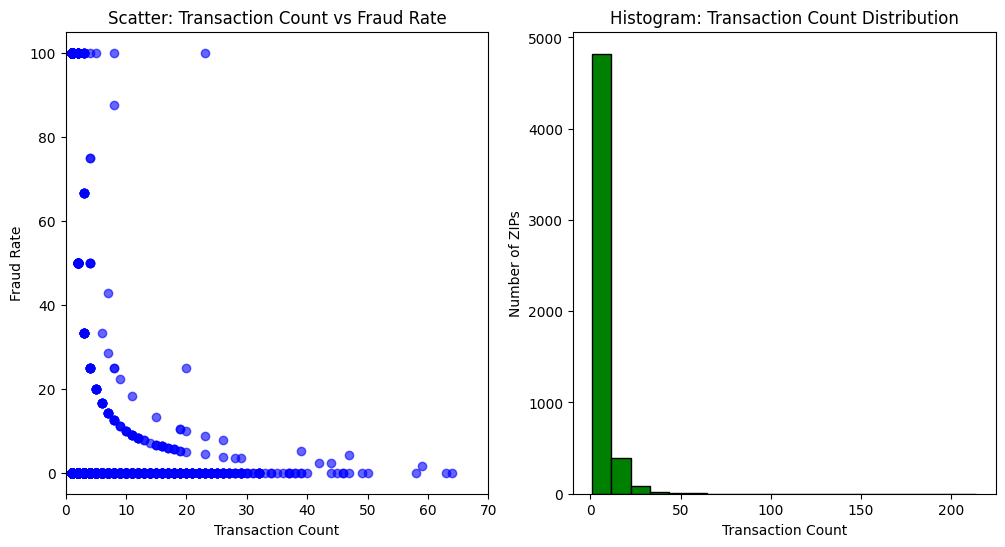

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(zip_states["total_transactions"], zip_states["fraud_rate"], color="blue", alpha=0.6)
axs[0].set_title('Scatter: Transaction Count vs Fraud Rate')
axs[0].set_xlabel('Transaction Count')
axs[0].set_ylabel('Fraud Rate')
axs[0].set_xlim(0, 70)

axs[1].hist(zip_states["total_transactions"], bins=20, color='green', edgecolor='black')
axs[1].set_title('Histogram: Transaction Count Distribution')
axs[1].set_xlabel('Transaction Count')
axs[1].set_ylabel('Number of ZIPs')


plt.show()

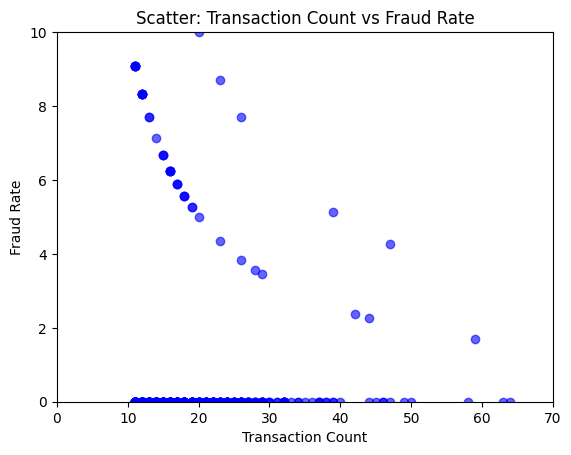

In [ ]:
plt.scatter(zip_states[zip_states["total_transactions"] > 10]["total_transactions"], zip_states[zip_states["total_transactions"] > 10]["fraud_rate"], color="blue", alpha=0.6)
plt.title('Scatter: Transaction Count vs Fraud Rate')
plt.xlabel('Transaction Count')
plt.ylabel('Fraud Rate')
plt.xlim(0, 70)
plt.ylim(0, 10)
plt.show()

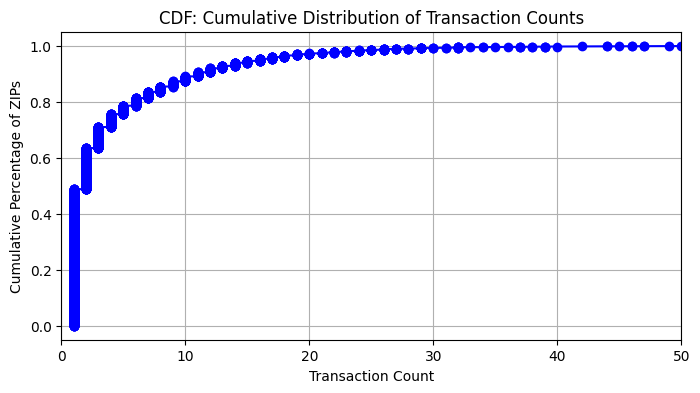

In [ ]:

plt.figure(figsize=(8, 4))
counts_sorted = np.sort(zip_states['total_transactions'])
cdf = np.arange(len(counts_sorted)) / len(counts_sorted)
plt.plot(counts_sorted, cdf, marker='o', linestyle='-', color='blue')
plt.xlabel('Transaction Count')
plt.ylabel('Cumulative Percentage of ZIPs')
plt.xlim(0,50)
plt.title('CDF: Cumulative Distribution of Transaction Counts')
plt.grid(True)
plt.show()


In [52]:
transaction_thresholds = [10, 20, 30]
for thresh in transaction_thresholds:
    num_of_left = zip_states[zip_states["total_transactions"] >= thresh].shape[0]
    print(f"{num_of_left} : {thresh:.2f}")

679 : 10.00
163 : 20.00
43 : 30.00


The threshold for classifying a zip code as a high frequent is 10+ total transactions.

In [53]:
# Finding the pest fraud rate for classifying zip codes as high fraud rate zip code
percentiles = [90, 95, 97, 99]
for p in percentiles:
    threshold = np.percentile(zip_states["fraud_rate"], p)
    print(f"{p}th percentile fraud rate threshold: {threshold:.2f}")

90th percentile fraud rate threshold: 6.67
95th percentile fraud rate threshold: 100.00
97th percentile fraud rate threshold: 100.00
99th percentile fraud rate threshold: 100.00


So 6.67 could be a good threshold for fraud rate.

In [54]:
zip_states[(zip_states["total_transactions"] < 10) & (zip_states["total_transactions"] > 3) & (zip_states["fraud_rate"] > 0)]["total_transactions"].sum()

354

In [55]:
train_df["nan_zip"] = train_df["zip"].isna().astype(int)

In [ ]:
# The first group of zip codes are the ones wich has over than 6.67% fraud rate and 10+ number of transactions
# The second group will be the ones wich has less than 10 and over than 3 transactions and over than 6.67 fraud rate
# The third group will be the ones wich has missing zip code values

# Afrer running the model this two new features should be deleted and than run the model another time to compare this to models

zip_states["high_freq_high_fraud"] = np.where((zip_states["total_transactions"] > 10) & (zip_states["fraud_rate"]>=6.67), 1, 0)
zip_states[zip_states["high_freq_high_fraud"] == 1]["total_transactions"].sum()

568

In [57]:
fraud_in_high_freq = train_df[train_df["zip"].isin(zip_states[zip_states["high_freq_high_fraud"] == 1]["zip"])]
fraud_ratio = fraud_in_high_freq["target"].mean()
print(f"Fraud Ratio in **High** Frequency Fraud Zips: {fraud_ratio:.2%}")

# I delete all of the varibles in this cell for clean code porpuses :)
del fraud_in_high_freq, fraud_ratio

Fraud Ratio in **High** Frequency Fraud Zips: 47.54%


In [58]:
total_frauds = train_df['target'].sum()

num_frauds_in_high_freq = train_df[train_df['zip'].isin(zip_states[zip_states["high_freq_high_fraud"] == 1]["zip"])]["target"].sum()

coverage = (num_frauds_in_high_freq / total_frauds) * 100

print(f"{coverage:.2f}%")

# I delete all of the varibles in this cell for clean code porpuses :)
del total_frauds, num_frauds_in_high_freq, coverage

3.45%


In [59]:
zip_states["low_freq_high_fraud"] = np.where((zip_states["total_transactions"] <= 10) & (zip_states["fraud_rate"]>=6.67), 1, 0)
zip_states[zip_states["low_freq_high_fraud"] == 1]["total_transactions"].sum()

979

In [60]:
fraud_in_low_freq = train_df[train_df["zip"].isin(zip_states[zip_states["low_freq_high_fraud"] == 1]["zip"])]
fraud_ratio = fraud_in_low_freq["target"].mean()
print(f"Fraud Ratio in **Low** Frequency Fraud Zips: {fraud_ratio:.2%}")

# I delete all of the varibles in this cell for clean code porpuses :)
del fraud_in_low_freq, fraud_ratio

Fraud Ratio in **Low** Frequency Fraud Zips: 59.86%


In [ ]:
total_frauds = train_df['target'].sum()

num_frauds_in_low_freq = train_df[train_df['zip'].isin(zip_states[zip_states["low_freq_high_fraud"] == 1]["zip"])]["target"].sum()

coverage = (num_frauds_in_low_freq / total_frauds) * 100

print(f"{coverage:.2f}%")
# I delete all of the varibles in this cell for clean code porpuses :)
del total_frauds, num_frauds_in_low_freq, coverage

7.48%


Adding this two features to train_df as a binary feature

In [62]:
train_df["zip_high_freq_high_fraud"] = train_df["zip"].map(zip_states.set_index("zip")["high_freq_high_fraud"])
# Becauese of NaN zip codes on train_df the "map" method above make the this new column nan.so I just use fillna(0)
train_df["zip_high_freq_high_fraud"] = train_df["zip_high_freq_high_fraud"].fillna(0)

In [63]:
train_df["zip_low_freq_high_fraud"] = train_df["zip"].map(zip_states.set_index("zip")["low_freq_high_fraud"])
# Becauese of NaN zip codes on train_df the "map" method above make the this new column nan.so I just use fillna(0)
train_df["zip_low_freq_high_fraud"] = train_df["zip_low_freq_high_fraud"].fillna(0)

In [64]:
# Saving tain_df as csv version 2
train_df.to_csv("train_df_save_2.csv")

Analysing merchant_state column

In [65]:
# The ratio of records with fraud targets and NaN merchant_state over all records with NaN merchant_state
round(((len(train_df[(train_df["target"] == 1) & (train_df["merchant_state"].isna())]) / (train_df["merchant_state"].isna().sum())) * 100), 2)



70.82

In [66]:
round((len(train_df[(train_df['target'] == 0) & (train_df["merchant_state"].isna())]) / train_df["merchant_state"].isna().sum() * 100), 2)

29.18

Becauese of high ratio of fraud records in records with NaN merchant_state, I make a new binary feature wich shows is merchant_state is missing or not.

In [67]:
train_df['nan_merchant_state'] = np.where((train_df['merchant_state'].isna()),1, 0)

Like what I did for zips, I'm going to analyse fraud rate for every unique state

In [68]:
merchant_states = train_df.groupby('merchant_state')['target'].agg(["count", "sum"]).reset_index()
merchant_states.columns = ["merchant_state", "total_transactions", "num_of_fraud"]
merchant_states["fraud_rate"] = ((merchant_states["num_of_fraud"] / merchant_states["total_transactions"])  * 100).round(3)
merchant_states.sort_values("fraud_rate" ,ascending=False, inplace=True)

In [69]:
merchant_states[merchant_states['fraud_rate'] > 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 27 to 40
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   merchant_state      47 non-null     object 
 1   total_transactions  47 non-null     int64  
 2   num_of_fraud        47 non-null     float64
 3   fraud_rate          47 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.8+ KB


In [70]:
all_transactions_with_state_value = merchant_states['total_transactions'].sum()
total_transactions_with_low_rate_fraud = merchant_states[(merchant_states["fraud_rate"] > 0) & (merchant_states["fraud_rate"] < 10)]['total_transactions'].sum()
print(round(total_transactions_with_low_rate_fraud / all_transactions_with_state_value * 100, 2),"%")

90.33 %


In [71]:
all_transactions_with_state_value = merchant_states['total_transactions'].sum()
total_transactions_with_high_rate_fraud = merchant_states[merchant_states["fraud_rate"] > 10]['total_transactions'].sum()
print(round(total_transactions_with_high_rate_fraud / all_transactions_with_state_value * 100, 2),"%")

7.54 %


In [72]:
all_transactions_with_state_value = merchant_states['total_transactions'].sum()
total_transactions_with_zero_rate_fraud = merchant_states[merchant_states["fraud_rate"] == 0]['total_transactions'].sum()
print(round(total_transactions_with_zero_rate_fraud / all_transactions_with_state_value * 100, 2),"%")

2.13 %


Becauese of low percentage for 0 fraud states to the respect of all transactions ,I don't assign a binary feature to represent that for each record

In [73]:
# If the state of a record has over than 10% fraud transactions, The "high_fraud_rate_state" will be 1, otherwise 0
# If the state of a record has less than 10% and over than 0% fraud transactions, The "Low_fraud_rate_state" will be 1, otherwise 0

merchant_states["high_fraud_state"] = np.where((merchant_states["fraud_rate"] >= 10),1 ,0)
merchant_states["low_fraud_states"] = np.where(((merchant_states["fraud_rate"] < 10) & (merchant_states['fraud_rate'] > 0)),1,0)

In [74]:
# Maping high/low fraud states on train_df
train_df["high_fraud_state"] = train_df["merchant_state"].map(merchant_states.set_index("merchant_state")['high_fraud_state'])
train_df["high_fraud_state"] = train_df["high_fraud_state"].fillna(0)

train_df["low_fraud_states"] = train_df["merchant_state"].map(merchant_states.set_index("merchant_state")['low_fraud_states'])
train_df["low_fraud_states"] = train_df["low_fraud_states"].fillna(0)

<h3>Analysing merchant_city</h3>

I just recognized that all of records with "ONLINE" merchant_city have missing values for zip. so It impacts that feature wich represents the presence of zip code, So I need to check the relation between fraud records and ONLINE records.

In [75]:
len(train_df[(train_df['merchant_city'] == "ONLINE") & (train_df["zip"].isna())])


9446

In [ ]:
all_onlines = len(train_df[(train_df['merchant_city'] == "ONLINE")])
all_online_and_frauds = len(train_df[(train_df['merchant_city'] == "ONLINE") & (train_df["target"] == 1)])
print(all_online_and_frauds / all_onlines * 100, "%")

70.82362904933305 %


So there are more than 70% of online transactions wich are frauds, approximatly like the ratio of fraud reords with nan zip code over all nan zip records. Thus I don't create a new binary feature to represent is it online or not.

In [77]:
merchant_cities = train_df.groupby('merchant_city')['target'].agg(["count", "sum"]).reset_index()
merchant_cities.columns = ["merchant_city", "total_transactions", "num_of_fraud"]
merchant_cities["fraud_rate"] = ((merchant_cities["num_of_fraud"] / merchant_cities["total_transactions"])  * 100).round(3)
merchant_cities.sort_values("fraud_rate" ,ascending=False, inplace=True)

In [78]:
merchant_cities

,merchant_city,total_transactions,num_of_fraud,fraud_rate
1706,Marshalltown,1,1.00,100.00
396,Cantonment,1,1.00,100.00
2734,Sugar Grove,1,1.00,100.00
2736,Sugarcreek,23,23.00,100.00
2737,Suitland,1,1.00,100.00
...,...,...,...,...
1139,Gunter,3,0.00,0.00
1140,Gustine,2,0.00,0.00
1141,Guston,1,0.00,0.00
1142,Guymon,3,0.00,0.00


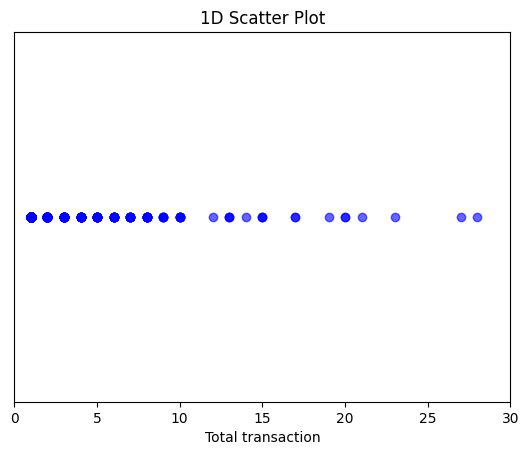

In [ ]:

y = np.zeros_like(merchant_cities[merchant_cities["fraud_rate"] >= 10]["total_transactions"])
plt.scatter(merchant_cities[merchant_cities["fraud_rate"] >= 10]["total_transactions"], y, marker='o', color='b', alpha=0.6)
plt.yticks([])
plt.xlabel("Total transaction")
plt.title("1D Scatter Plot")
plt.xlim(0, 30)

plt.show()

In [80]:
mean_value = np.mean(merchant_cities[(merchant_cities["fraud_rate"] >= 10) & (merchant_cities["total_transactions"] < 250)]["total_transactions"])
print("Mean of total transactions:", mean_value)

Mean of total transactions: 3.7750677506775068


In [ ]:
train_df.head(1)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,target,sin_day,event_time,use_Chip Transaction,use_Online Transaction,use_Swipe Transaction,is_expenses,Bad CVV,Bad Expiration,Bad Card Number,Bad PIN,Insufficient Balance,Technical Glitch,mcc_amount_mean,mcc_amount_std,mcc_amount_zscore,mmc_freq,mcc_fraud_rate,nan_zip,zip_high_freq_high_fraud,zip_low_freq_high_fraud,nan_merchant_state,high_fraud_state,low_fraud_states
0,7475722,2010-01-01 06:44:00,1091,3334,6.46,Swipe Transaction,26810,Baltimore,MD,21224.00,5541,,0.00,0.02,6.73,0,0,1,0,0,0,0,0,0,0,51.87,36.43,-1.25,2681,0.00,0,0.00,0.00,0,0.00,1.00


Ananlysing Client ID column

In [82]:
clients_transactions = train_df.groupby(by="client_id")["amount"].count().reset_index()

In [ ]:
clients_transactions.describe()

,client_id,amount
count,1208.00,1208.00
mean,1004.74,26.49
std,582.63,13.59
min,0.00,1.00
25%,493.25,17.00
50%,1021.00,24.50
75%,1513.25,34.00
max,1998.00,98.00


In [84]:
client_ids = train_df.groupby('client_id')['target'].agg(["count", "sum"]).reset_index()
client_ids.columns = ["client_id","total_transactions", "num_of_fraud"]
client_ids["fraud_rate"] = ((client_ids["num_of_fraud"] / client_ids["total_transactions"])  * 100).round(3)
client_ids.sort_values("fraud_rate" ,ascending=False, inplace=True)

In [85]:
client_ids.head(5)

,client_id,total_transactions,num_of_fraud,fraud_rate
996,1649,33,30.00,90.91
496,826,23,20.00,86.96
760,1267,29,25.00,86.21
1107,1833,7,6.00,85.71
250,403,30,25.00,83.33


In [86]:
client_ids.describe()

,client_id,total_transactions,num_of_fraud,fraud_rate
count,1208.00,1208.00,1208.00,1208.00
mean,1004.74,26.49,6.48,21.63
std,582.63,13.59,7.18,20.85
min,0.00,1.00,0.00,0.00
25%,493.25,17.00,0.00,0.00
50%,1021.00,24.50,5.00,18.75
75%,1513.25,34.00,10.00,36.84
max,1998.00,98.00,50.00,90.91


In [87]:
# Making a new feature that for each record shows the fraud rate of it's client.

train_df["client_fraud_rate"] = train_df["client_id"].map(client_ids.set_index("client_id")["fraud_rate"])

In [88]:
train_df.head(5)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,target,sin_day,event_time,use_Chip Transaction,use_Online Transaction,use_Swipe Transaction,is_expenses,Bad CVV,Bad Expiration,Bad Card Number,Bad PIN,Insufficient Balance,Technical Glitch,mcc_amount_mean,mcc_amount_std,mcc_amount_zscore,mmc_freq,mcc_fraud_rate,nan_zip,zip_high_freq_high_fraud,zip_low_freq_high_fraud,nan_merchant_state,high_fraud_state,low_fraud_states,client_fraud_rate
0,7475722,2010-01-01 06:44:00,1091,3334,6.46,Swipe Transaction,26810,Baltimore,MD,21224.00,5541,,0.00,0.02,6.73,0,0,1,0,0,0,0,0,0,0,51.87,36.43,-1.25,2681,0.00,0,0.00,0.00,0,0.00,1.00,0.00
1,7476708,2010-01-01 10:37:00,1740,5885,15.59,Swipe Transaction,22938,Mukwonago,WI,53149.00,5812,,0.00,0.02,10.62,0,0,1,0,0,0,0,0,0,0,27.47,28.66,-0.41,1958,0.03,0,0.00,0.00,0,0.00,1.00,70.59
2,7476815,2010-01-01 10:58:00,1966,4087,37.14,Swipe Transaction,32175,Harrison,AR,72601.00,7538,,0.00,0.02,10.97,0,0,1,0,0,0,0,0,0,0,55.41,51.73,-0.35,862,0.01,0,0.00,0.00,0,0.00,1.00,6.12
3,7476921,2010-01-01 11:22:00,39,2413,69.14,Swipe Transaction,60569,Plantsville,CT,6479.00,5300,,0.00,0.02,11.37,0,0,1,0,0,0,0,0,0,0,81.72,98.17,-0.13,1896,0.38,0,0.00,0.00,0,0.00,1.00,0.00
4,7477218,2010-01-01 12:18:00,1135,4977,7.73,Swipe Transaction,75781,Blue Springs,MO,64015.00,5411,,0.00,0.02,12.30,0,0,1,0,0,0,0,0,0,0,27.12,37.48,-0.52,2896,0.04,0,0.00,0.00,0,0.00,1.00,0.00
